<a href="https://colab.research.google.com/github/Oulsjeg/Coating-Characteristics/blob/main/CoatingChar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from numpy import loadtxt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler  
!pip install scikit-multilearn
from skmultilearn.model_selection import iterative_train_test_split
from warnings import filterwarnings
import seaborn as sns
from sklearn.metrics import accuracy_score
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import matplotlib as plt
from IPython.display import Image

In [70]:
!git clone https://github.com/Oulsjeg/Coating-Characteristics

fatal: destination path 'Coating-Characteristics' already exists and is not an empty directory.


In [71]:
features = pd.read_csv('/content/Coating-Characteristics/RegData/train.csv')


In [72]:
labels=features.drop(['Grit','Alcohol','Water','TiO_2','Plasma Power','Standoff','Nozzle Dia'], axis = 1)


In [73]:
features= features.drop(['WCA','SA'], axis = 1)


In [74]:
train_features, test_features, train_labels, test_labels = train_test_split(features, 
                                                                            labels, 
                                                                            test_size = 0.2, 
                                                                            random_state = 42)


In [75]:
paramrf={'bootstrap': True,
'ccp_alpha': 0.0,
'criterion': 'mse',
'max_depth': None,
'max_features': 'auto',
'max_leaf_nodes': None,
'max_samples': None,
'min_impurity_decrease': 0.0,
# 'min_impurity_split': None,
'min_samples_leaf': 1,
'min_samples_split': 2,
'min_weight_fraction_leaf': 0.0,
'n_estimators': 1000, ##The number of trees in the forest.
'n_jobs': None,
'oob_score': False,
'random_state': 42,
'verbose': 0,
'warm_start': False}


rf = RandomForestRegressor(**paramrf) #SVR()
rf.fit(train_features, train_labels)
predictions_rf = rf.predict(test_features)
R2_rf=r2_score(test_labels, predictions_rf)
errors_rf=abs(predictions_rf-test_labels)
# print(predictions_rf)
print('Mean Absolute Error cgb:', round(np.mean(errors_rf), 2), 'degrees.')
print('R2 randomforest score: ', R2_rf)

Mean Absolute Error cgb: SA     1.72
WCA    2.60
dtype: float64 degrees.
R2 randomforest score:  0.8811433056747929


In [76]:
Grit = 1.5 #@param [3.5, 2.5, 1.5] {type:"raw"}
# print(Grit)

Alcohol_Solvent = True #@param {type:"boolean"}
# print(Alcohol_Solvent)

TiO2 = 10 #@param [10, 20] {type:"raw"}
# print(TiO2)

Plasma_Power= 36 #@param [25,36] {type:"raw"}
# print(Plasma_Power)

Standoff_Distance = 3.8 #@param {type:"slider", min:3, max:5, step:0.1}
# print(Standoff_Distance)

Nozzle_Diameter = 6.5 #@param {type:"slider", min:5, max:8, step:0.1}
# print(Nozzle_Diameter)

row=[Grit,Alcohol_Solvent, not Alcohol_Solvent, TiO2, Plasma_Power,
     Standoff_Distance, Nozzle_Diameter]
# print(row)
# row = [3,1,0,10,25,5,8]
yhat = rf.predict([row])
print(yhat[0])

[  8.7597 160.927 ]


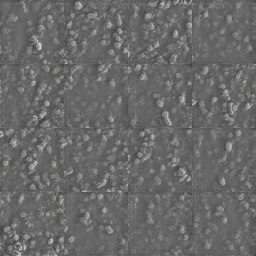

In [77]:
if (yhat[0][0])<6:
  display(Image(filename='/content/Coating-Characteristics/GENIMG/3t6/generated_483.png')) 
elif yhat[0][0]<9:
  display(Image(filename='/content/Coating-Characteristics/GENIMG/6t9/generated_481.png')) 
else:
  display(Image(filename='/content/Coating-Characteristics/GENIMG/9pl/generated_480.png')) 

